In [3]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [4]:
# Read in data
df = pd.read_csv('./Resources/filmtv_movies - ENG.csv')
df

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,221040,Louis C.K.: Sorry,2021,Comedy,63,United States,Louis C.K.,Louis C.K.,6.0,NaN,6.0,1,0,0,0,0,0
40299,221041,"Me, Natalie",1969,Comedy,111,United States,Fred Coe,"Patty Duke, James Farentino, Martin Balsam, Al...",8.0,NaN,8.0,1,0,0,0,0,0
40300,221059,Il nero,1967,Drama,107,Italy,Giovanni Vento,"Joy Nwosu, Alessandra Dal Sasso, Andrea Checch...",6.0,6.00,NaN,1,0,0,0,0,0
40301,221061,Operatsiya 'Y' i drugie priklyucheniya Shurika,1965,Comedy,95,Soviet Union,Leonid Gaidai,"Aleksandr Demyanenko, Mikhail Pugovkin, Alekse...",6.0,6.00,NaN,1,0,0,0,0,0


In [5]:
print(df.shape)

(40303, 17)


In [6]:
# Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40303 entries, 0 to 40302
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     40303 non-null  int64  
 1   title         40303 non-null  object 
 2   year          40303 non-null  int64  
 3   genre         40208 non-null  object 
 4   duration      40303 non-null  int64  
 5   country       40292 non-null  object 
 6   directors     40270 non-null  object 
 7   actors        38251 non-null  object 
 8   avg_vote      40303 non-null  float64
 9   critics_vote  35703 non-null  float64
 10  public_vote   39829 non-null  float64
 11  total_votes   40303 non-null  int64  
 12  humor         40303 non-null  int64  
 13  rhythm        40303 non-null  int64  
 14  effort        40303 non-null  int64  
 15  tension       40303 non-null  int64  
 16  erotism       40303 non-null  int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 5.2+ MB


In [7]:
# Drop duplicates in data set
df.drop_duplicates()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,221040,Louis C.K.: Sorry,2021,Comedy,63,United States,Louis C.K.,Louis C.K.,6.0,NaN,6.0,1,0,0,0,0,0
40299,221041,"Me, Natalie",1969,Comedy,111,United States,Fred Coe,"Patty Duke, James Farentino, Martin Balsam, Al...",8.0,NaN,8.0,1,0,0,0,0,0
40300,221059,Il nero,1967,Drama,107,Italy,Giovanni Vento,"Joy Nwosu, Alessandra Dal Sasso, Andrea Checch...",6.0,6.00,NaN,1,0,0,0,0,0
40301,221061,Operatsiya 'Y' i drugie priklyucheniya Shurika,1965,Comedy,95,Soviet Union,Leonid Gaidai,"Aleksandr Demyanenko, Mikhail Pugovkin, Alekse...",6.0,6.00,NaN,1,0,0,0,0,0


In [8]:
# Drop null data and read data
df = df.dropna()
df

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
5,21,The Uranian Conspiracy,1978,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,6.0,3,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40277,219449,Aftersun,2022,Thriller,70,Spain,Lluís Galter,"Lola Daniel, Alex Moreu, Carmela Poch, Ainoa S...",6.0,7.00,5.0,2,0,0,0,0,0
40278,219450,Daseos beonjjae hyungchu,2022,Horror,62,South Korea,Syeyoung Park,"Jihyeon Park, Hyein Moon, Seokyoung Haam",7.0,7.00,7.0,2,0,0,0,0,0
40284,220175,Natale a tutti i costi,2022,Comedy,90,Italy,Giovanni Bognetti,"Christian De Sica, Angela Finocchiaro, Dharma ...",4.9,4.67,5.0,27,0,0,0,0,0
40286,220208,I migliori giorni,2023,Comedy,125,Italy,"Massimiliano Bruno, Edoardo Leo","Edoardo Leo, Massimiliano Bruno, Anna Fogliett...",5.5,6.00,5.0,4,1,2,1,1,0


In [9]:
# Create new csv of cleaned data

In [10]:
# Drop Useless columns
df.drop(['filmtv_id','title'],axis=1,inplace=True)


C:\Users\Kristina Andrews\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df.head()

,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
1,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
5,1978,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,6.0,3,1,2,0,2,0


In [12]:
df.describe()

,year,duration,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
count,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000
mean,1990.687635,101.698433,5.886594,5.774753,6.028715,41.150455,0.655031,1.544748,0.757239,1.073283,0.353195
std,23.667148,25.360573,1.359514,1.591284,1.441867,72.580917,0.924257,1.098851,1.133063,1.111187,0.667636
min,1910.000000,41.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1973.000000,90.000000,5.000000,4.630000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,98.000000,6.000000,6.000000,6.000000,14.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,2010.000000,109.000000,6.900000,7.000000,7.000000,42.000000,1.000000,2.000000,1.000000,2.000000,1.000000
max,2023.000000,1525.000000,10.000000,10.000000,10.000000,1056.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [13]:
# Unique value types of each column
unique=df.nunique()
print(unique)

year              113
genre              27
duration          247
country          1746
directors       11419
actors          33318
avg_vote           89
critics_vote      606
public_vote        10
total_votes       564
humor               6
rhythm              6
effort              6
tension             6
erotism             5
dtype: int64


In [14]:
# Print out the Country value counts
country_counts=df.country.value_counts()
country_counts.head()

United States    13561
Italy             6795
France            1851
Great Britain     1640
Germany            592
Name: country, dtype: int64

<AxesSubplot:ylabel='Density'>

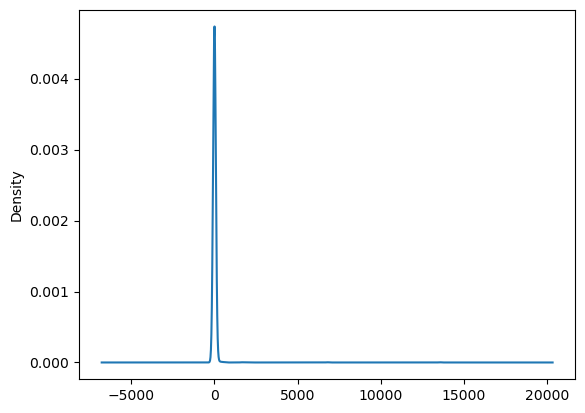

In [15]:
# Visualize the value counts
country_counts.plot.density()

In [16]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 199].index)

# Replace in DataFrame
for country in replace_countries:
    df.country = df.country.replace(country,"Other")


# Check to make sure binning was successful
df.country.value_counts()

C:\Users\Kristina Andrews\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


United States    13561
Italy             6795
Other             6758
France            1851
Great Britain     1640
Germany            592
Japan              506
Canada             415
Italy, France      364
Spain              330
South Korea        214
France, Italy      206
Australia          200
Name: country, dtype: int64

In [17]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(df.country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

C:\Users\Kristina Andrews\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Country_Australia,Country_Canada,Country_France,"Country_France, Italy",Country_Germany,Country_Great Britain,Country_Italy,"Country_Italy, France",Country_Japan,Country_Other,Country_South Korea,Country_Spain,Country_United States
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
# Merge the two DataFrames together and drop the Country column
df2=df.merge(encode_df,left_index=True,right_index=True).drop("country",1)

C:\Users\Kristina Andrews\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [30]:
# Drop directors and actors column
df2=df.drop(['actors','directors'],axis=1,inplace=True)
df

KeyError: "['actors' 'directors'] not found in axis"

In [31]:
df2

,year,genre,duration,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,...,"Country_France, Italy",Country_Germany,Country_Great Britain,Country_Italy,"Country_Italy, France",Country_Japan,Country_Other,Country_South Korea,Country_Spain,Country_United States
1,1991,Drama,98,6.5,6.00,7.0,4,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1976,Romantic,91,5.6,6.00,5.0,9,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1982,Comedy,95,7.0,8.00,6.0,18,2,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1942,Comedy,85,5.9,5.33,7.0,15,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1978,Spy,117,4.8,3.50,6.0,3,1,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33425,2018,Drama,94,4.5,4.25,5.0,13,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33428,2018,Comedy,94,6.5,6.86,6.0,86,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33429,2017,Drama,121,6.4,6.08,7.0,38,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
33430,2018,Comedy,96,4.2,4.00,4.0,20,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Transform genre column from string to integer
def change_string(genre):
    if genre =="Drama":
        return 1
    else:
        return 0
df2["genre"]=df2["genre"].apply(change_string)
df2.head()

,year,genre,duration,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,...,"Country_France, Italy",Country_Germany,Country_Great Britain,Country_Italy,"Country_Italy, France",Country_Japan,Country_Other,Country_South Korea,Country_Spain,Country_United States
1,1991,1,98,6.5,6.00,7.0,4,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1976,0,91,5.6,6.00,5.0,9,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1982,0,95,7.0,8.00,6.0,18,2,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1942,0,85,5.9,5.33,7.0,15,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1978,0,117,4.8,3.50,6.0,3,1,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Rename genre column to drama_genre
df2=df2.rename({"genre":"drama_genre"},axis=1)
df2.head()

,year,drama_genre,duration,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,...,"Country_France, Italy",Country_Germany,Country_Great Britain,Country_Italy,"Country_Italy, France",Country_Japan,Country_Other,Country_South Korea,Country_Spain,Country_United States
1,1991,1,98,6.5,6.00,7.0,4,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1976,0,91,5.6,6.00,5.0,9,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1982,0,95,7.0,8.00,6.0,18,2,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1942,0,85,5.9,5.33,7.0,15,3,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1978,0,117,4.8,3.50,6.0,3,1,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Define the features set.
X = df2.copy()
X = X.drop("drama_genre", axis=1)
X.head()

,year,duration,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,...,"Country_France, Italy",Country_Germany,Country_Great Britain,Country_Italy,"Country_Italy, France",Country_Japan,Country_Other,Country_South Korea,Country_Spain,Country_United States
1,1991,98,6.5,6.00,7.0,4,0,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1976,91,5.6,6.00,5.0,9,1,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1982,95,7.0,8.00,6.0,18,2,2,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1942,85,5.9,5.33,7.0,15,3,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1978,117,4.8,3.50,6.0,3,1,2,0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Define the target set.
y = df2["drama_genre"].ravel()
y[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [39]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [41]:
# Creating a StandardScaler instance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [43]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [44]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [45]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,4456,560
Actual 1,1112,1228


In [46]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [47]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4456,560
Actual 1,1112,1228


Accuracy Score : 0.7727025557368135
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      5016
           1       0.69      0.52      0.59      2340

    accuracy                           0.77      7356
   macro avg       0.74      0.71      0.72      7356
weighted avg       0.76      0.77      0.76      7356



In [49]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1294944296119936, 'year'),
 (0.12604318041822898, 'duration'),
 (0.11645422797452919, 'total_votes'),
 (0.11396757835116658, 'avg_vote'),
 (0.10110413685349491, 'critics_vote'),
 (0.09192446539768766, 'effort'),
 (0.08479509548665784, 'humor'),
 (0.04720769764044514, 'public_vote'),
 (0.044037423369839006, 'tension'),
 (0.03818781548195368, 'rhythm'),
 (0.028104032917967564, 'erotism'),
 (0.015810897924412277, 'Country_United States'),
 (0.013444937128058608, 'Country_Italy'),
 (0.013224254408160751, 'Country_Other'),
 (0.0075888947410413235, 'Country_France'),
 (0.007165825136366398, 'Country_Great Britain'),
 (0.0038753734521411553, 'Country_Germany'),
 (0.0037291246001646054, 'Country_Japan'),
 (0.0030689129181078628, 'Country_Italy, France'),
 (0.0030217503911415667, 'Country_Canada'),
 (0.002258631281452971, 'Country_Spain'),
 (0.0020153321871773317, 'Country_South Korea'),
 (0.001870908020345602, 'Country_France, Italy'),
 (0.001605074307465409, 'Country_Australia')]